In [92]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from deap import creator, base, tools, algorithms

data = pd.read_csv(r"C:\Users\cmebr\Desktop\110BProj1\large1.csv")
sudoku0 = data['quizzes'][0]
sol0 = data['solutions'][0]

#Define an encoded list of the fixed values for all of our games.
allFixedValues = []
for n in range(len(data['quizzes'])):
    fixedValue = []
    quiz = np.reshape([int(c) for c in data['quizzes'][n]], (9,9))
    for i in range(9):
        for j in range(9):
            if quiz[i][j] != 0:
                fixedValue.append([quiz[i][j], i, j])
    allFixedValues.append(np.array(fixedValue))        
        
sols = []
for n in range(len(data['solutions'])):
    sols.append(np.reshape([int(c) for c in data['solutions'][n]], (9,9)))

In [136]:
def printBoard(board):
    for i in range(len(board)):
        if(i % 3 == 0 and i != 0):
            print("------+------+------")
        for j in range(len(board[i])):
            if(j % 3 == 0 and j != 0):
                sys.stdout.write("|")
            sys.stdout.write(str(board[i][j]) + " ")
        print("")

def printBoardFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    printBoard(board)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("pos_val", random.randint, 1, 9)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.pos_val, n=64)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def fitnessFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    return fitnessFromBoard(board),

def buildBoardFromDNA64(individual):
    flattenedIdx = list(map(lambda t: t[1]*9 + t[2], fixedValues))
    values = fixedValues.T[0]
    flatBoard = []
    fixedValuesCounter = 0
    for i in range(81):
        if(i in flattenedIdx):
            flatBoard.append(values[fixedValuesCounter])
            fixedValuesCounter += 1
            continue
        flatBoard.append(individual[i - fixedValuesCounter])
    return np.array(flatBoard).reshape(9,9)


def fitnessFromBoard(board):
    score = 0
    rows, cols = board.shape
    for row in board:
        score += len(np.unique(row))
    for col in board.T:
        score += len(np.unique(col))
    for i in range(0, 3):
        for j in range(0, 3):
            sub = board[3*i:3*i+3, 3*j:3*j+3]
            score += len(np.unique(sub))
    return score

toolbox.register("evaluate", fitnessFromDNA64)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=9, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selBest, k = 300)

C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [94]:
import time

population = toolbox.population(n=100)

fixedValues = allFixedValues[0]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
gensMin = []
gensMax = []
gensAvg = []
gensStd = []

start = time.time()

NGEN=100
for gen in range(NGEN):
	print("---GEN %i ---" % gen)
	offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
	fits = toolbox.map(toolbox.evaluate, offspring, solution)
	for fit, ind in zip(fits, offspring):
		ind.fitness.values = fit
	
	# Gather all the fitnesses in one list and print the stats
	fits = [ind.fitness.values[0] for ind in offspring]
	# print(list(fits))

	length = len(population)
	mean = sum(fits) / length
	sum2 = sum(x*x for x in fits)
	std = abs(sum2 / length - mean**2)**0.5

	gensMin.append(min(fits))
	gensMax.append(max(fits))
	gensAvg.append(mean)
	gensStd.append(std)

	# print("  Min %s" % int(min(fits)))
	print("  Max %s" % int(max(fits)))
	# print("  Avg %s" % mean)
	# print("  Std %s" % std)
	population = toolbox.select(offspring, k=len(population))
topk = tools.selBest(population, k=1)
#print(top10)
for solution in topk:
	print("Pontos: %i/243" % int(fitnessFromDNA64(solution)[0]))
	printBoardFromDNA64(solution)
	print(sols[0])
	print("")
    
end = time.time()
print("Total Time: {t:6.2f} secs.".format(t=(end-start)))

---GEN 0 ---


IndexError: tuple index out of range

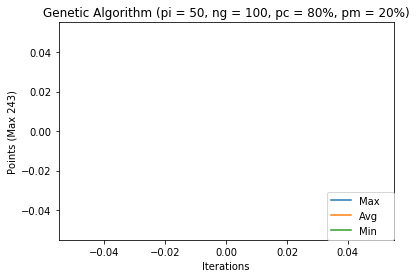

In [49]:
plt.subplot(111)
plt.plot(gensMax, label="Max")
plt.plot(gensAvg, label="Avg")
plt.plot(gensMin, label="Min")
plt.legend(bbox_to_anchor=(0.8, 0.0, 0.2, .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.title('Genetic Algorithm (pi = 50, ng = 100, pc = 80%, pm = 20%)')
plt.ylabel('Points (Max 243)')
plt.xlabel('Iterations')
plt.show()

In [151]:
data = pd.read_csv(r"C:\Users\cmebr\Desktop\110BProj1\small2.csv")

allFixedValues = []
for n in range(len(data['quizzes'])):
    fixedValue = []
    quiz = np.reshape([int(c) for c in data['quizzes'][n]], (9,9))
    for i in range(9):
        for j in range(9):
            if quiz[i][j] != 0:
                fixedValue.append([quiz[i][j], i, j])
    allFixedValues.append(np.array(fixedValue))
    
sols = []
for n in range(len(data['solutions'])):
    sols.append(np.reshape([int(c) for c in data['solutions'][n]], (1,9**2)))

    
#for n in range(100):
randFixed = []
randIndex = np.random.randint(0,1011,100)
for i in randIndex:
    randFixed.append(allFixedValues[i])
print(randIndex[1])
print(randFixed[1])
print(np.reshape([int(c) for c in data['quizzes'][randIndex[1]]], (9,9)))

500
[[8 0 8]
 [7 1 1]
 [6 1 2]
 [8 1 5]
 [9 2 1]
 [6 2 7]
 [4 3 2]
 [2 3 5]
 [6 3 8]
 [1 4 2]
 [7 4 7]
 [4 4 8]
 [8 5 1]
 [7 5 5]
 [2 5 6]
 [1 6 0]
 [2 6 2]
 [3 6 5]
 [9 7 0]
 [4 7 4]
 [2 7 7]
 [1 7 8]
 [8 8 2]
 [6 8 5]
 [3 8 7]]
[[0 0 0 0 0 0 0 0 8]
 [0 7 6 0 0 8 0 0 0]
 [0 9 0 0 0 0 0 6 0]
 [0 0 4 0 0 2 0 0 6]
 [0 0 1 0 0 0 0 7 4]
 [0 8 0 0 0 7 2 0 0]
 [1 0 2 0 0 3 0 0 0]
 [9 0 0 0 4 0 0 2 1]
 [0 0 8 0 0 6 0 3 0]]


In [ ]:
import time

scores = []
corr = 0

population = toolbox.population(n=100)

allMin = []
allMax = []
allAvg = []
allStd = []

for i in range(len(randFixed)):
#    fixedValues = allFixedValues[i]

    fixedValues = randFixed[i]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
    gensMin = []
    gensMax = []
    gensAvg = []
    gensStd = []

    start = time.time()

    NGEN=150
    for gen in range(NGEN):
        #print("---GEN %i ---" % gen)
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in offspring]
        # print(list(fits))

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        gensMin.append(min(fits))
        gensMax.append(max(fits))
        gensAvg.append(mean)
        gensStd.append(std)

        # print("  Min %s" % int(min(fits)))
        #print("  Max %s" % int(max(fits)))
        # print("  Avg %s" % mean)
        # print("  Std %s" % std)
        population = toolbox.select(offspring, k=len(population))
    topk = tools.selBest(population, k=1)
    #print(top10)
    for solution in topk:
        print("Pontos: %i/243" % int(fitnessFromDNA64(solution)[0]))
        printBoardFromDNA64(solution)
        print("Given:", np.reshape([int(c) for c in data['quizzes'][randIndex[i]]], (9,9)))
        print("Answer:", np.reshape(sols[randIndex[i]],(9,9)))
        print("")
    
    allMin.append(gensMin)
    allMax.append(gensMax)
    allAvg.append(gensAvg)
    allStd.append(gensStd)
    tot = 243*(i+1)
    corr += int(fitnessFromDNA64(solution)[0])
    scores.append(int(fitnessFromDNA64(solution)[0]))
    end = time.time()
    print("Total Time: {t:6.2f} secs. Success rate: {corr} / {tot}.".format(t=(end-start),corr = corr, tot = tot))

Pontos: 219/243
5 8 1 |4 9 7 |3 6 6 
9 2 7 |3 8 1 |7 5 9 
3 4 9 |6 5 2 |8 2 4 
------+------+------
1 5 4 |8 7 3 |6 1 3 
2 9 6 |5 4 9 |2 8 1 
7 8 3 |1 6 2 |9 4 7 
------+------+------
4 7 1 |2 3 5 |6 9 8 
8 6 2 |9 1 7 |4 7 5 
9 3 5 |8 2 6 |1 3 2 
Given: [[0 8 0 4 0 0 0 0 6]
 [9 0 0 0 0 1 0 5 0]
 [0 0 0 6 0 0 0 2 0]
 [0 0 4 0 7 0 0 0 0]
 [0 9 0 5 0 0 2 0 0]
 [0 0 3 1 0 2 0 0 7]
 [0 0 0 0 0 0 0 9 8]
 [0 0 0 0 1 7 4 0 5]
 [0 3 0 0 0 0 1 0 0]]
Answer: [[5 8 7 4 2 9 3 1 6]
 [9 2 6 7 3 1 8 5 4]
 [3 4 1 6 8 5 7 2 9]
 [2 1 4 9 7 8 5 6 3]
 [7 9 8 5 6 3 2 4 1]
 [6 5 3 1 4 2 9 8 7]
 [1 7 2 3 5 4 6 9 8]
 [8 6 9 2 1 7 4 3 5]
 [4 3 5 8 9 6 1 7 2]]

Total Time:   7.53 secs. Success rate: 219 / 243.
Pontos: 218/243
5 1 9 |7 3 6 |4 2 8 
3 7 6 |5 2 8 |9 3 4 
8 9 3 |2 7 4 |1 6 5 
------+------+------
9 3 4 |3 1 2 |3 5 6 
6 2 1 |9 8 5 |8 7 4 
7 8 5 |6 4 7 |2 1 9 
------+------+------
1 6 2 |4 9 3 |7 4 8 
9 3 7 |8 4 7 |5 2 1 
4 5 8 |1 5 6 |6 3 2 
Given: [[0 0 0 0 0 0 0 0 8]
 [0 7 6 0 0 8 0 0 0]
 [0 9 0 0 0

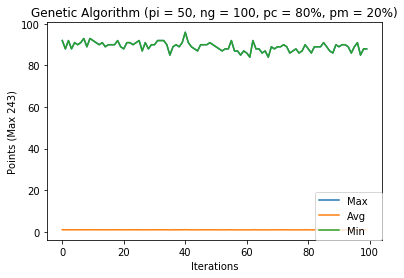

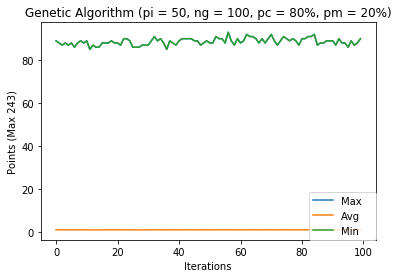

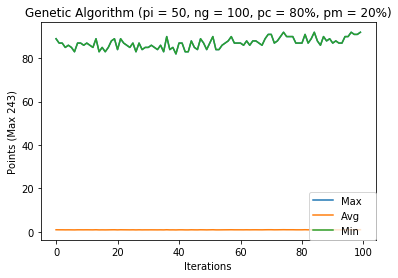

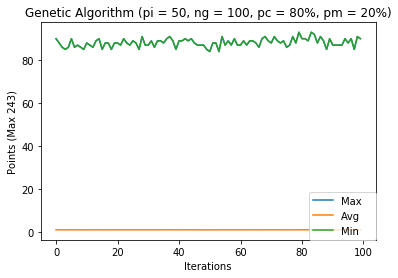

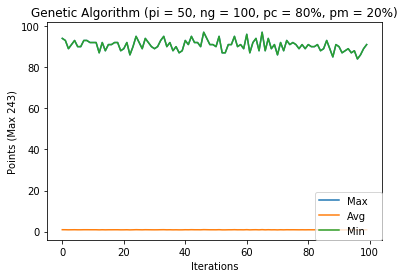

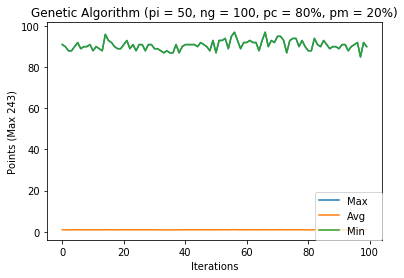

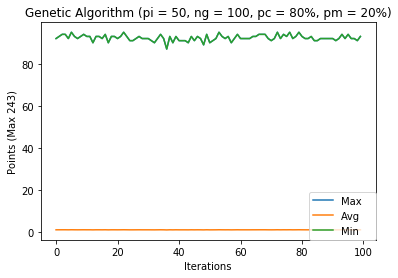

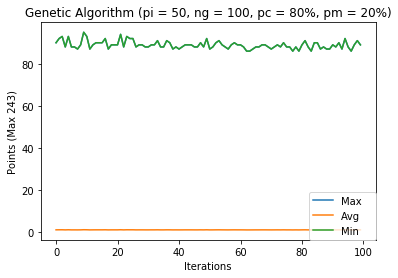

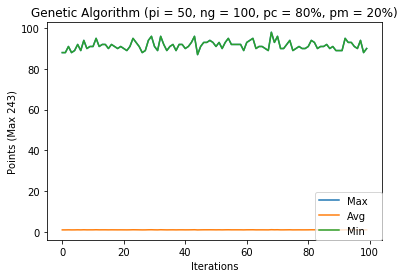

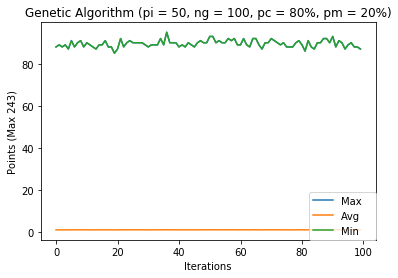

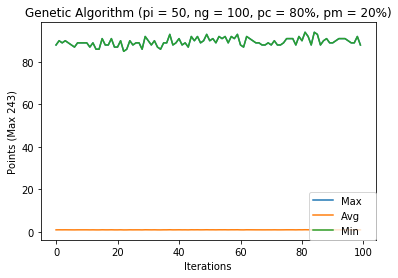

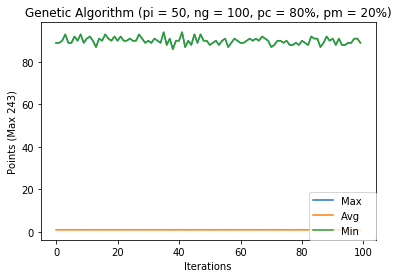

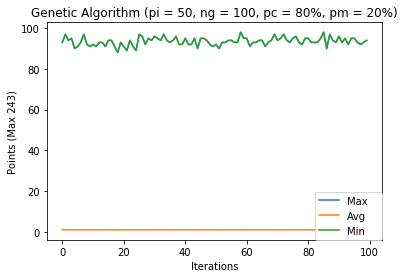

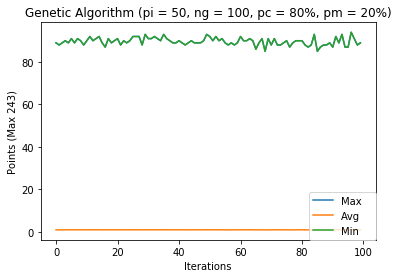

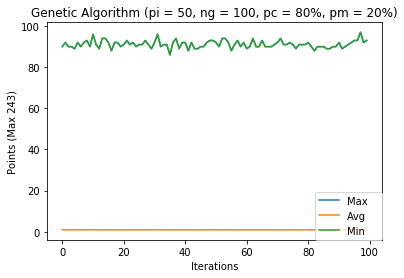

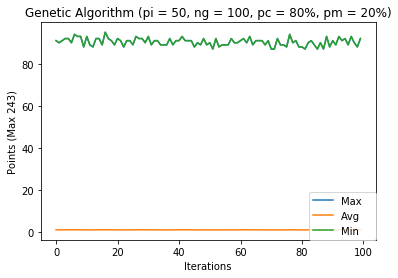

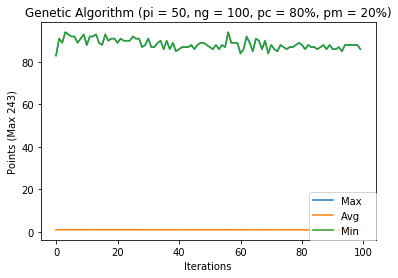

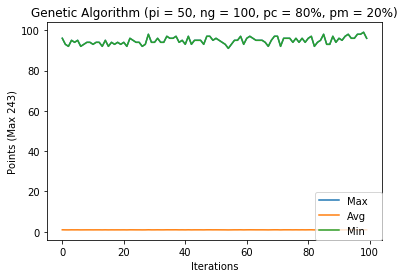

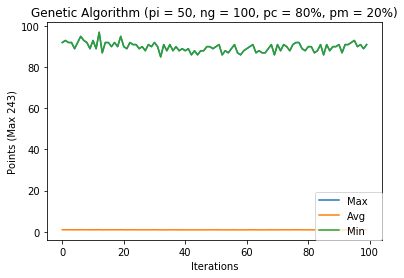

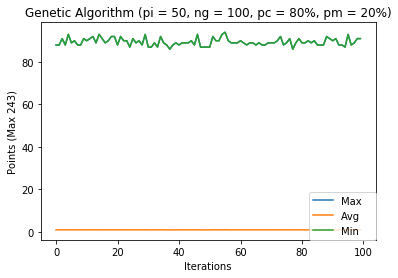

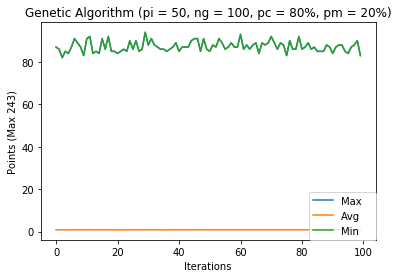

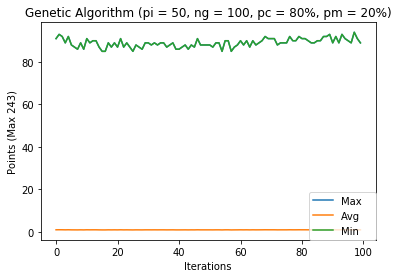

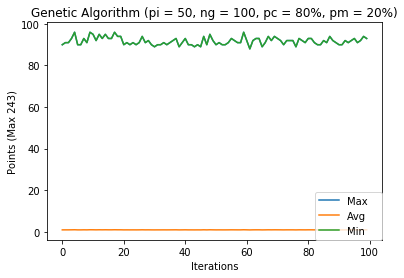

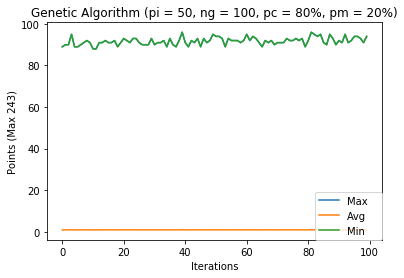

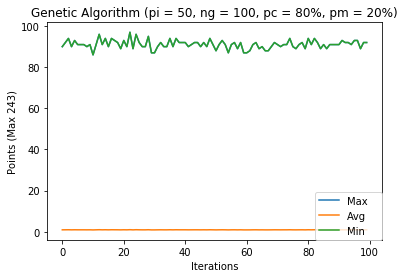

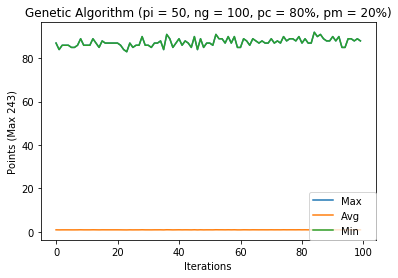

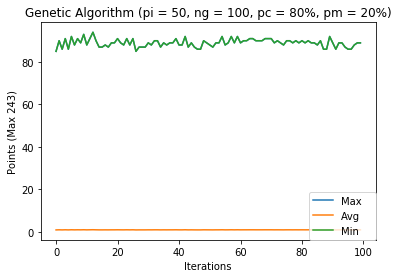

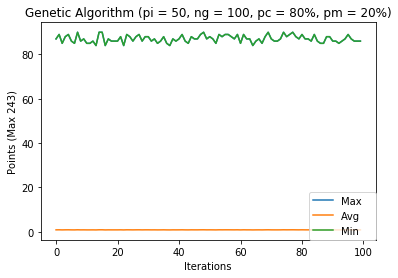

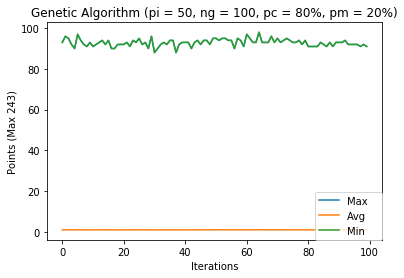

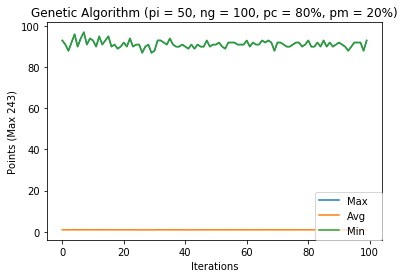

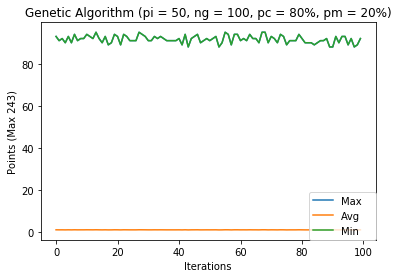

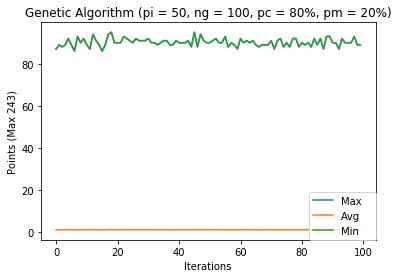

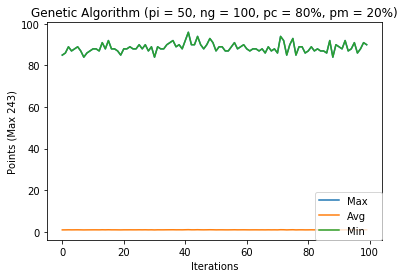

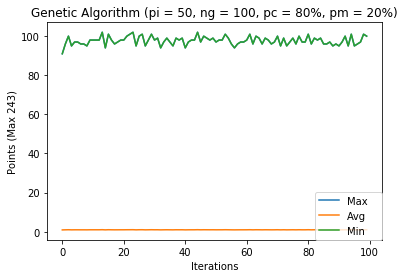

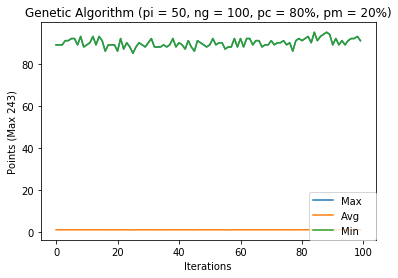

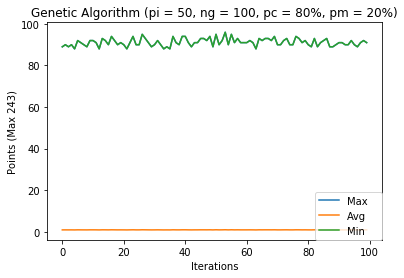

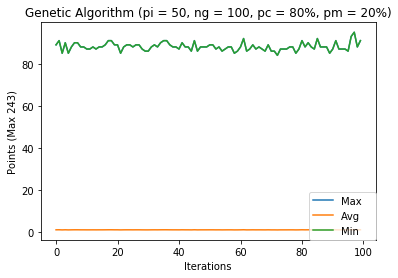

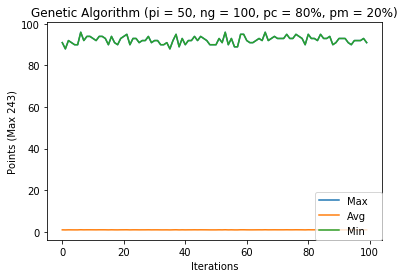

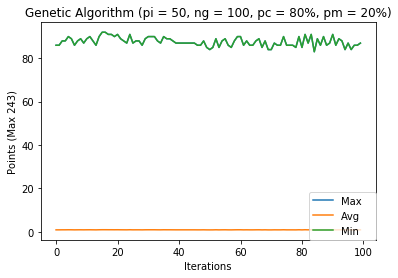

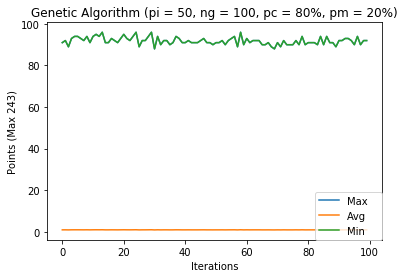

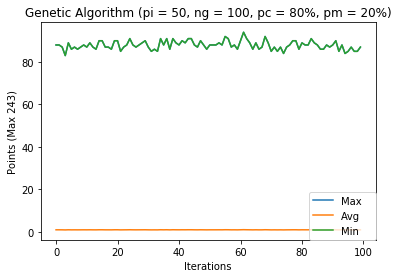

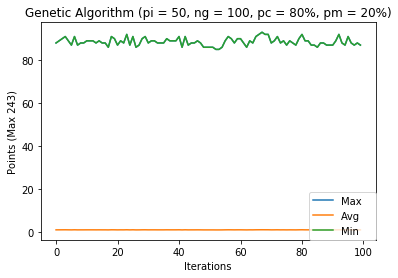

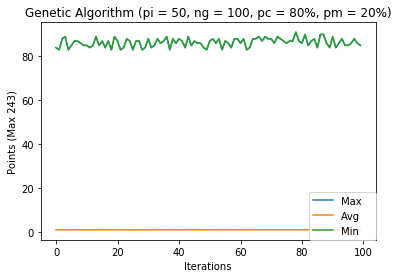

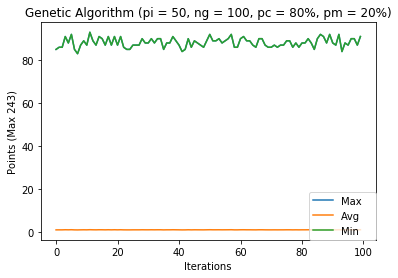

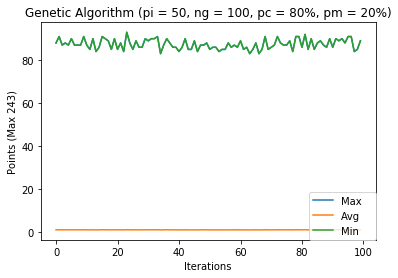

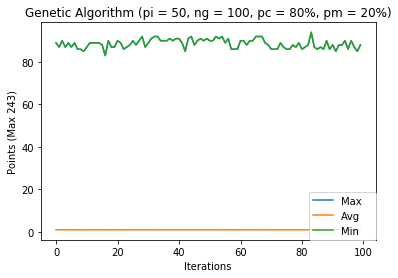

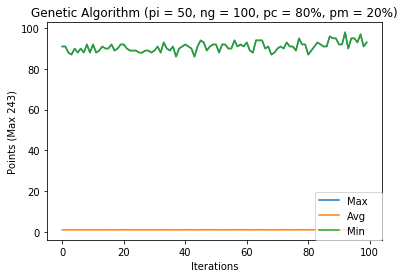

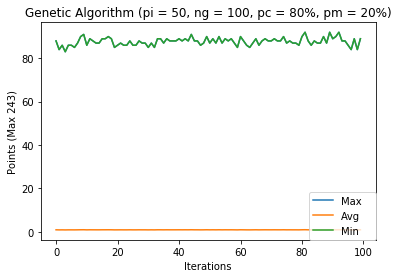

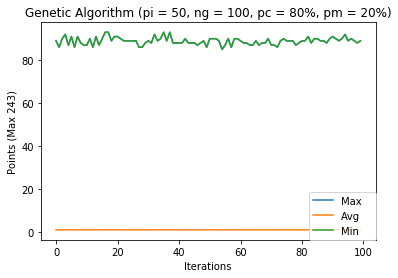

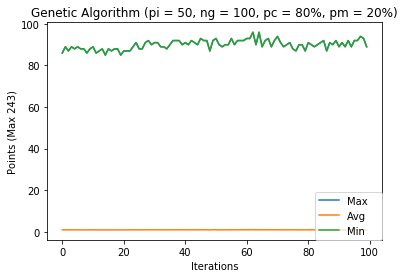

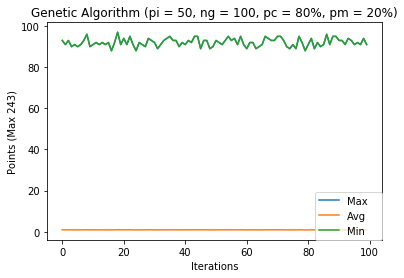

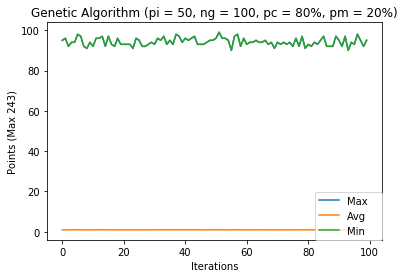

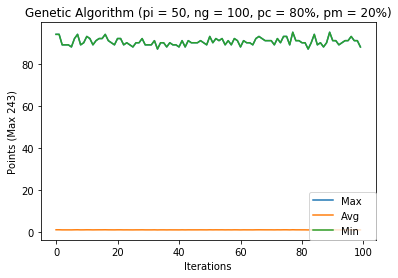

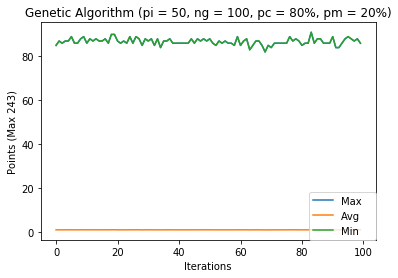

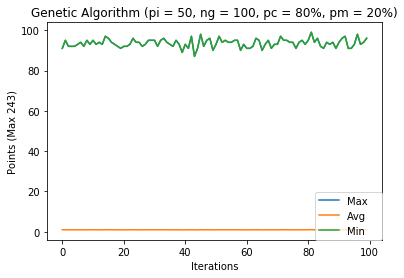

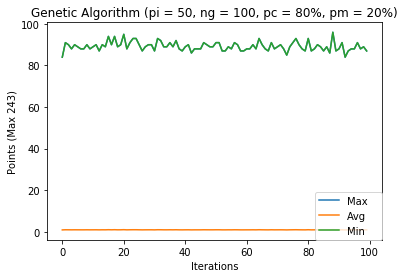

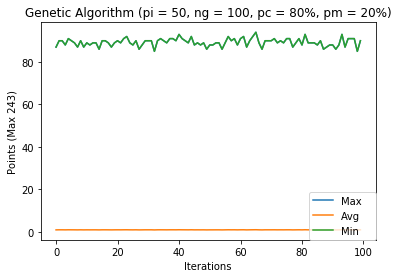

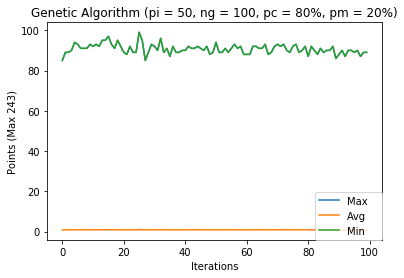

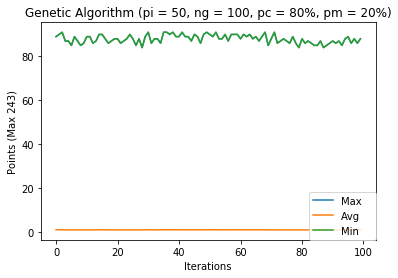

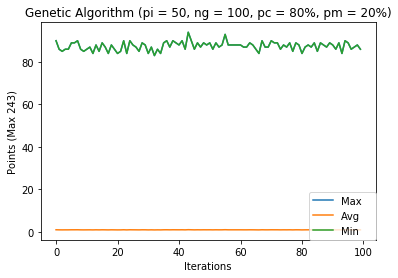

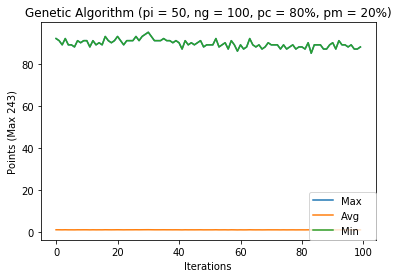

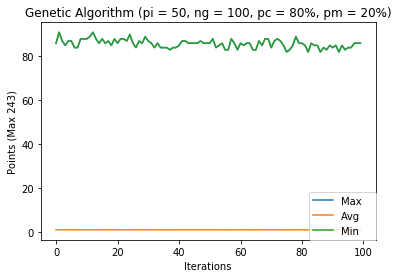

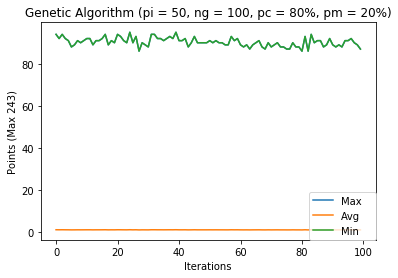

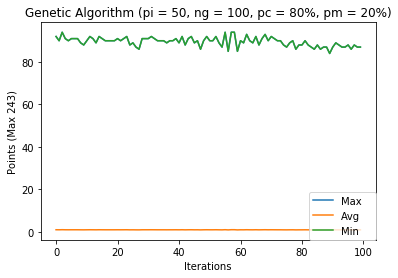

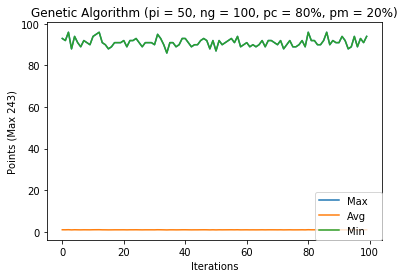

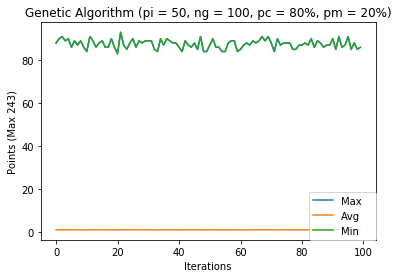

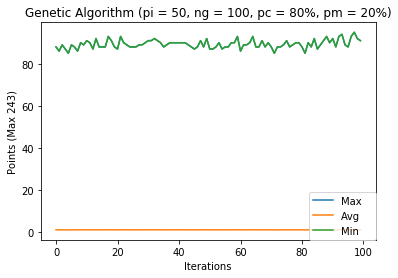

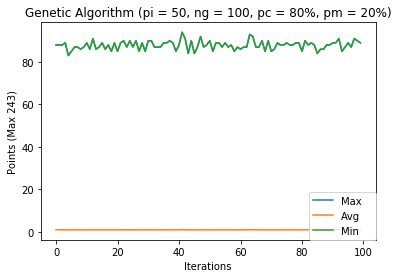

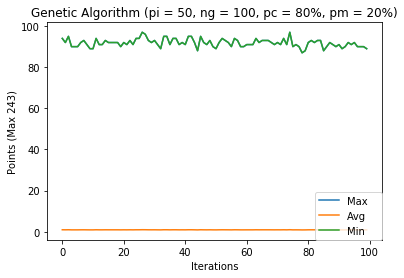

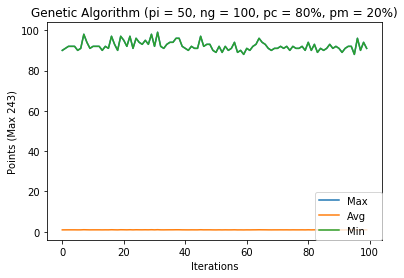

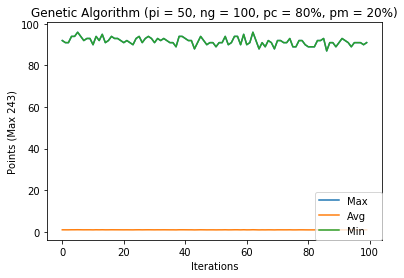

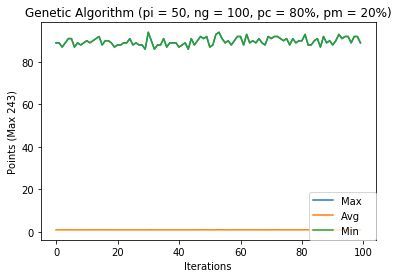

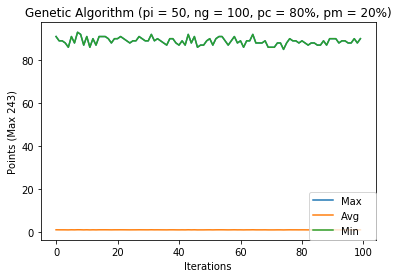

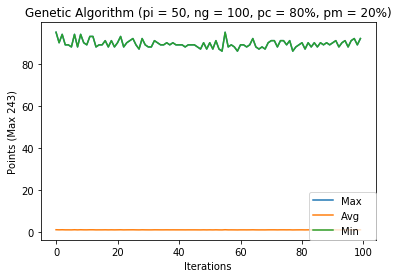

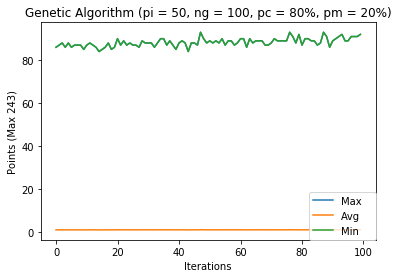

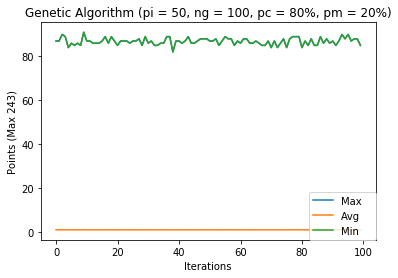

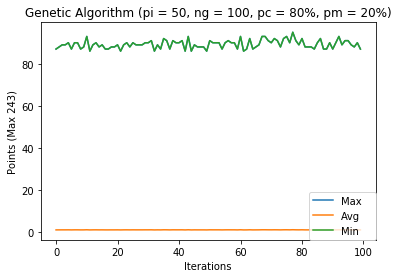

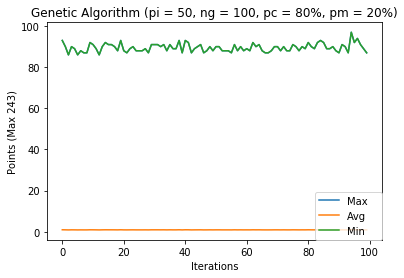

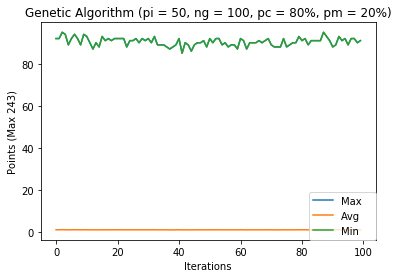

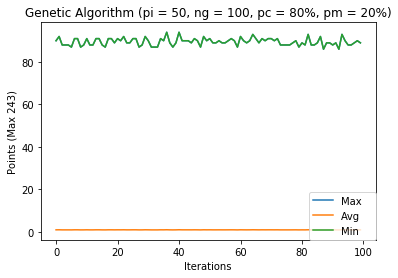

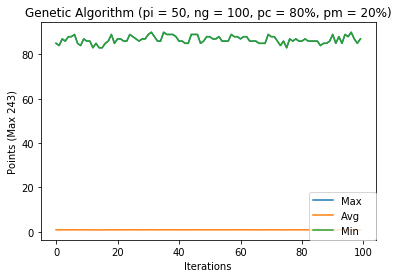

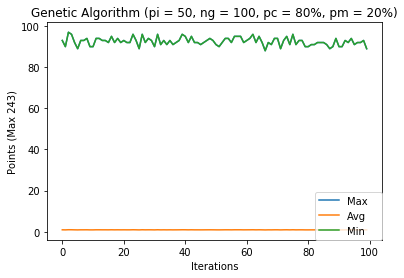

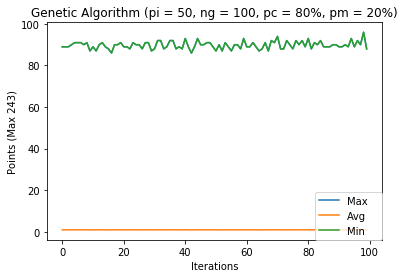

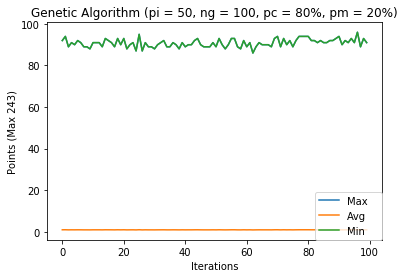

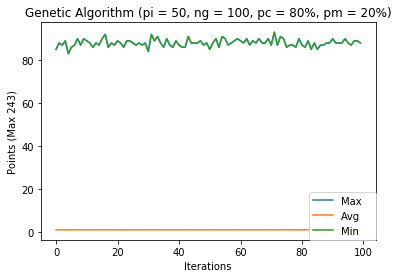

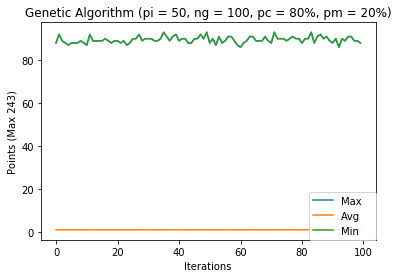

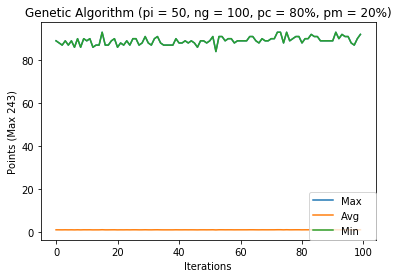

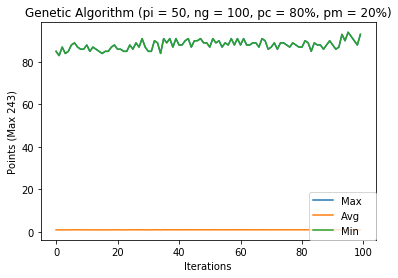

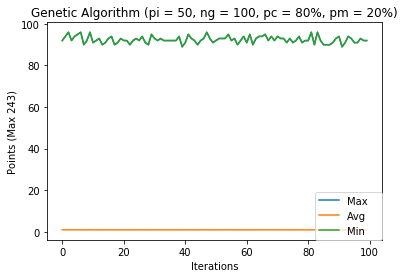

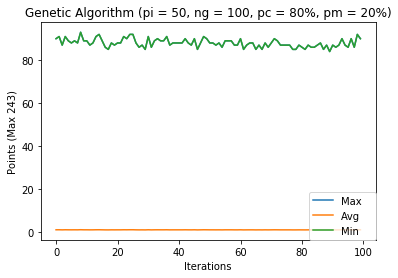

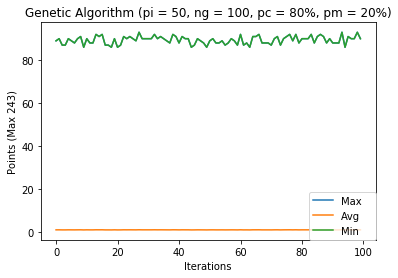

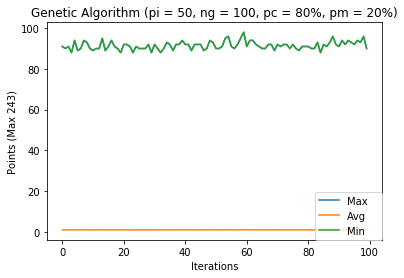

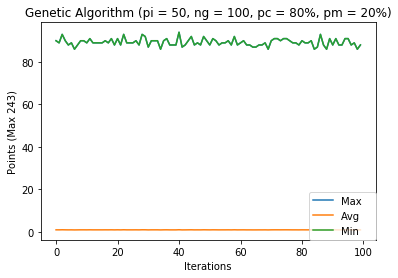

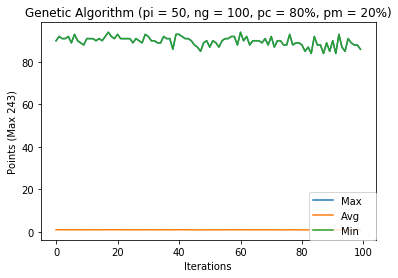

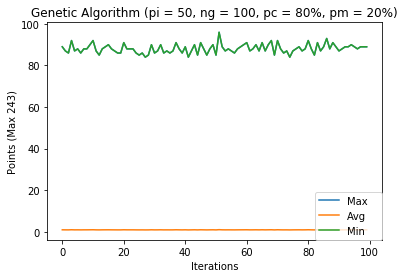

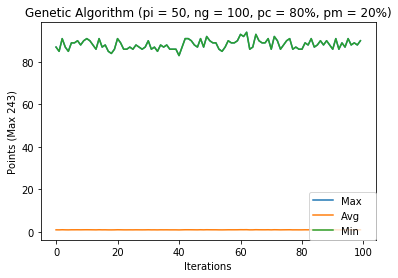

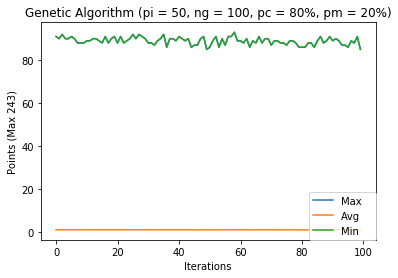

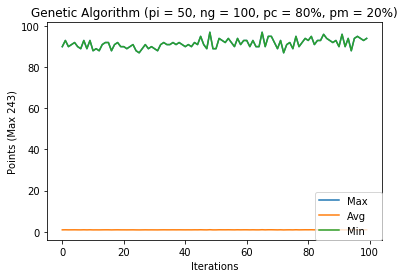

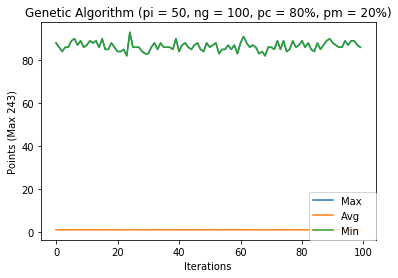

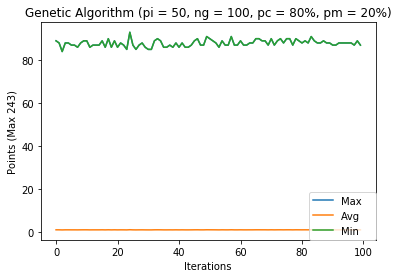

In [124]:
plt.subplot(111)
for i in range(len(randFixed)):
    plt.plot(allMax[i], label="Max")
    plt.plot(allAvg[i], label="Avg")
    plt.plot(allMin[i], label="Min")
    plt.legend(bbox_to_anchor=(0.8, 0.0, 0.2, .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
    plt.title('Genetic Algorithm (pi = 50, ng = 100, pc = 80%, pm = 20%)')
    plt.ylabel('Points (Max 243)')
    plt.xlabel('Iterations')
    plt.show()

# Trying to use accuracy over uniqueness

In [118]:
def printBoard(board):
    for i in range(len(board)):
        if(i % 3 == 0 and i != 0):
            print("------+------+------")
        for j in range(len(board[i])):
            if(j % 3 == 0 and j != 0):
                sys.stdout.write("|")
            sys.stdout.write(str(board[i][j]) + " ")
        print("")

def printBoardFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    printBoard(board)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("pos_val", random.randint, 1, 9)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.pos_val, n=64)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def fitnessFromDNA64(individual, solution):
    board = buildBoardFromDNA64(individual)
    return fitnessFromBoard(board, solution),

def buildBoardFromDNA64(individual):
    flattenedIdx = list(map(lambda t: t[1]*9 + t[2], fixedValues))
    values = fixedValues.T[0]
    flatBoard = []
    fixedValuesCounter = 0
    for i in range(81):
        if(i in flattenedIdx):
            flatBoard.append(values[fixedValuesCounter])
            fixedValuesCounter += 1
            continue
        flatBoard.append(individual[i - fixedValuesCounter])
    return np.array(flatBoard).reshape(9,9)


#def fitnessFromBoard(board, solution):
#    score = 0
#    rows, cols = board.shape
#    for row in board:
#        print(row)
#        score += len(np.unique(row))
#    for col in board.T:
#        score += len(np.unique(col))
#    for i in range(0, 3):
#        for j in range(0, 3):
#            sub = board[3*i:3*i+3, 3*j:3*j+3]
#            score += len(np.unique(sub))
#    return score

def fitnessFromBoard(board, solution):
    solution = np.reshape(solution, (9,9))
    score = 0
    rows, cols = board.shape
    for i in range(rows):
        score += np.sum(board[i]==solution[i])
        for j in range(cols):
            score += np.sum(board[i][j]==solution[i][j])
    for i in range(0, 3):
        for j in range(0, 3):
            sub1 = board[3*i:3*i+3, 3*j:3*j+3]
            sub2 = solution[3*i:3*i+3, 3*j:3*j+3]
            score += np.sum(sub1 != sub2)
    return score
    
toolbox.register("evaluate", fitnessFromDNA64)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=9, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selBest, k = 300)

C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [128]:
import time

scores = []
corr = 0

population = toolbox.population(n=100)

allMin = []
allMax = []
allAvg = []
allStd = []

for i in range(len(randFixed)):
#    fixedValues = allFixedValues[i]
    solution = sols[i]
    fixedValues = randFixed[i]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
    gensMin = []
    gensMax = []
    gensAvg = []
    gensStd = []

    start = time.time()

    NGEN=100
    for gen in range(NGEN):
        #print("---GEN %i ---" % gen)
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring, solution)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values for ind in offspring]
        fits = fits[0]
        # print(list(fits))

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        gensMin.append(min(fits))
        gensMax.append(max(fits))
        gensAvg.append(mean)
        gensStd.append(std)

        # print("  Min %s" % int(min(fits)))
        #print("  Max %s" % int(max(fits)))
        # print("  Avg %s" % mean)
        # print("  Std %s" % std)
        population = toolbox.select(offspring, k=len(population))
    topk = tools.selBest(population, k=1)
    #print(top10)
    for sol in topk:
        print("Points: %i/243" % int(fitnessFromDNA64(sol, solution)[0]))
        printBoardFromDNA64(sol)
        print(np.reshape(sols[i],(9,9)))
        print("")
    
    allMin.append(gensMin)
    allMax.append(gensMax)
    allAvg.append(gensAvg)
    allStd.append(gensStd)
    tot = 243*(i+1)
    corr += int(fitnessFromDNA64(sol, solution)[0])
    scores.append(int(fitnessFromDNA64(sol, solution)[0]))
    end = time.time()
    print("Total Time: {t:6.2f} secs. Success rate: {corr} / {tot}.".format(t=(end-start),corr = corr, tot = tot))

TypeError: unhashable type: 'Individual'